# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from yellowbrick.cluster import KElbowVisualizer


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Preprocessing Data

In [4]:
X = pd.read_excel (r'/content/drive/MyDrive/data_disjas.xlsx')
X
#Keterangan Variabel
#X1 : Mendapat Informasi/Berita
#X2 : Mendapatkan Informasi Untuk Proses Pembelajaran
#X3 : Mengirim/Menerima Email
#X4 : Media Sosial

,kode_prov,provinsi,X1,X2,X3,X4
0,11,ACEH,85.41,41.11,20.34,93.35
1,12,SUMATERA UTARA,79.26,55.14,16.25,94.24
2,13,SUMATERA BARAT,80.18,59.35,21.90,95.17
3,14,RIAU,80.43,52.39,18.16,94.94
4,15,JAMBI,79.97,48.36,14.24,94.30
5,16,SUMATERA SELATAN,73.90,56.15,14.48,95.21
6,17,BENGKULU,78.32,54.72,17.02,94.70
7,18,LAMPUNG,72.24,57.32,10.69,93.38
8,19,KEP. BANGKA BELITUNG,77.81,55.68,17.77,96.63
9,21,KEP. RIAU,82.98,53.09,25.82,95.57


In [5]:
round(X.iloc[:,2:6].describe(include='all'),2)

,X1,X2,X3,X4
count,34.00,34.00,34.00,34.00
mean,77.16,53.28,18.66,94.48
std,5.98,5.06,6.14,1.61
min,60.76,41.11,10.69,90.12
25%,75.22,50.43,14.71,93.46
50%,77.35,54.39,17.58,94.90
75%,80.37,56.69,20.24,95.34
max,89.32,62.60,43.05,97.77


In [6]:
X_use = X.iloc[:,2:6]
label = X.iloc[:,1]
label.unique()
label = ['ACEH', 'SUMATERA UTARA', 'SUMATERA BARAT', 'RIAU', 'JAMBI',
       'SUMATERA SELATAN', 'BENGKULU', 'LAMPUNG', 'KEP. BANGKA BELITUNG',
       'KEP. RIAU', 'DKI JAKARTA', 'JAWA BARAT', 'JAWA TENGAH',
       'DI YOGYAKARTA', 'JAWA TIMUR', 'BANTEN', 'BALI',
       'NUSA TENGGARA BARAT', 'NUSA TENGGARA TIMUR', 'KALIMANTAN BARAT',
       'KALIMANTAN TENGAH', 'KALIMANTAN SELATAN', 'KALIMANTAN TIMUR',
       'KALIMANTAN UTARA', 'SULAWESI UTARA', 'SULAWESI TENGAH',
       'SULAWESI SELATAN', 'SULAWESI TENGGARA', 'GORONTALO',
       'SULAWESI BARAT', 'MALUKU', 'MALUKU UTARA', 'PAPUA BARAT','PAPUA']

## Detect Outliers

In [7]:
def detect_outlier(data):
    # find q1 and q3 values
    q1, q3 = np.percentile(sorted(data), [25, 75])
 
    # compute IRQ
    iqr = q3 - q1
 
    # find lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
 
    outliers = [x for x in data if x <= lower_bound or x >= upper_bound]
 
    return outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[89.32, 88.82, 66.16, 60.76, 65.89]

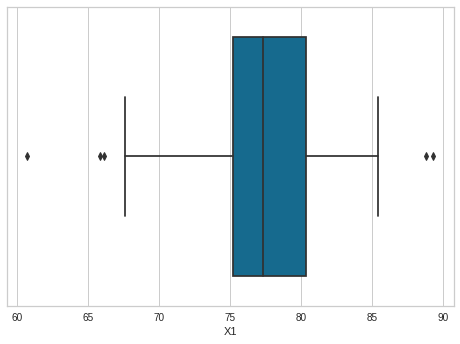

In [8]:
# Box Plot
sns.boxplot(X['X1'])
detect_outlier(X['X1'])


In [9]:
X.query("X1 == 89.32 or X1 == 88.82 or X1 == 66.16 or X1 == 60.76 or X1 == 65.89")

,kode_prov,provinsi,X1,X2,X3,X4
10,31,DKI JAKARTA,89.32,51.20,43.05,95.92
16,51,BALI,88.82,55.53,19.96,95.72
25,72,SULAWESI TENGAH,66.16,52.06,14.26,95.06
28,75,GORONTALO,60.76,54.15,17.40,96.03
31,82,MALUKU UTARA,65.89,43.66,14.58,92.18


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

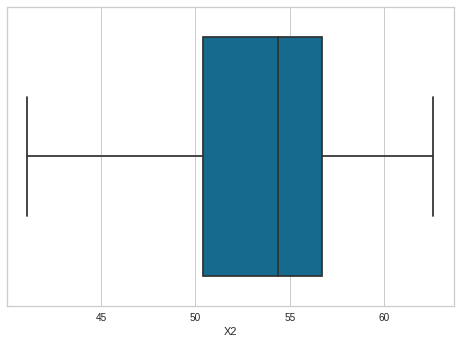

In [10]:
sns.boxplot(X['X2'])
detect_outlier(X['X2'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[43.05, 33.32]

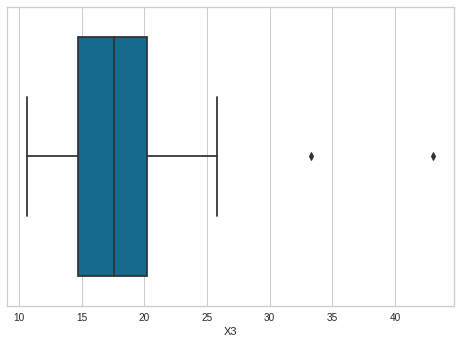

In [13]:
sns.boxplot(X['X3'])
detect_outlier(X['X3'])

In [15]:
X.query("X3 == 43.05 or X3 == 33.32")

,kode_prov,provinsi,X1,X2,X3,X4
10,31,DKI JAKARTA,89.32,51.2,43.05,95.92
13,34,DI YOGYAKARTA,81.86,62.6,33.32,97.77


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[90.12]

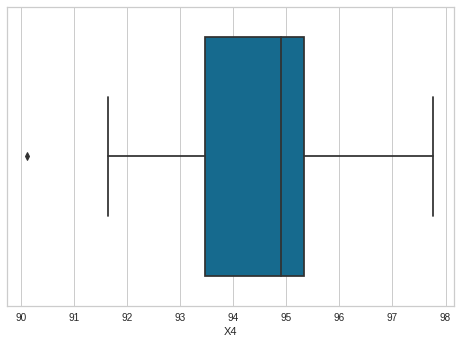

In [16]:
sns.boxplot(X['X4'])
detect_outlier(X['X4'])

In [18]:
X.query("X4 == 90.12")

,kode_prov,provinsi,X1,X2,X3,X4
33,94,PAPUA,81.19,43.46,14.06,90.12


## Multicollinearity Test

In [27]:
X_use

,X1,X2,X3,X4
0,85.41,41.11,20.34,93.35
1,79.26,55.14,16.25,94.24
2,80.18,59.35,21.90,95.17
3,80.43,52.39,18.16,94.94
4,79.97,48.36,14.24,94.30
5,73.90,56.15,14.48,95.21
6,78.32,54.72,17.02,94.70
7,72.24,57.32,10.69,93.38
8,77.81,55.68,17.77,96.63
9,82.98,53.09,25.82,95.57


In [20]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["Variabel"] = X_use.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_use.values, i)
                          for i in range(len(X_use.columns))]
  
vif_data

,Variabel,VIF
0,X1,254.128582
1,X2,153.036300
2,X3,15.548499
3,X4,416.108885


Terbukti terdapat multikolinearitas pada data variabel yang digunakan

In [21]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 669 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 199 kB 24.2 MB/s 
     |████████████████████████████████| 98 kB 8.6 MB/s 
     |████████████████████████████████| 8.8 MB 68.8 MB/s 
     |████████████████████████████████| 468 kB 66.1 MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=c8e9cfb532f8641f59b6eca3d49231ef02bb0dd86a93758adecdfabb21619a1d
  Stored in directory: /root/.cache/pip/wheels/ed/90/48/766e09628cc5bbcf57c2eb063972c1e956a03422dd6d84fde2
Successfully built factor-analyzer


In [22]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(X_use)
chi_square_value, p_value

(38.31943639834889, 9.728509734453733e-07)

Tolak H0 karena P-value < α, maka terbukti variabel-variabel saling berkorelasi, hal ini bermakna bahwa terdapat hubungan antarvariabel (multikolinearitas) sehingga layak untuk dilakukan PCA pada data yang digunakan

## KMO Test

In [28]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(X_use)

In [26]:
round(kmo_model,3)

0.551

H0 gagal tolak karena nilai KMO > 0,5
Jadi, dapat disimpulkan bahwa data sudah cukup untuk dilakukan PCA

## Feature Scaling (using Robust Scaler)

In [29]:
sc = RobustScaler()
scaler = sc.fit(X_use)
X_scaled = scaler.transform(X_use)

# Converting the numpy array into a pandas DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X_use.columns)
X_scaled

,X1,X2,X3,X4
0,1.564078,-2.120559,0.499548,-0.827128
1,0.369903,0.119760,-0.239386,-0.353723
2,0.548544,0.792016,0.781391,0.140957
3,0.597087,-0.319361,0.105691,0.018617
4,0.507767,-0.962874,-0.602529,-0.321809
5,-0.670874,0.281038,-0.559169,0.162234
6,0.187379,0.052695,-0.100271,-0.109043
7,-0.993204,0.467864,-1.243902,-0.811170
8,0.088350,0.205988,0.035230,0.917553
9,1.092233,-0.207585,1.489612,0.353723


In [30]:
round(X_scaled.describe(),2)


,X1,X2,X3,X4
count,34.00,34.00,34.00,34.00
mean,-0.04,-0.18,0.20,-0.23
std,1.16,0.81,1.11,0.86
min,-3.22,-2.12,-1.24,-2.55
25%,-0.42,-0.63,-0.52,-0.77
50%,0.00,0.00,0.00,0.00
75%,0.58,0.37,0.48,0.23
max,2.32,1.31,4.60,1.52


In [31]:
X_scaled = X_scaled.assign(provinsi=label)
X_scaled

,X1,X2,X3,X4,provinsi
0,1.564078,-2.120559,0.499548,-0.827128,ACEH
1,0.369903,0.119760,-0.239386,-0.353723,SUMATERA UTARA
2,0.548544,0.792016,0.781391,0.140957,SUMATERA BARAT
3,0.597087,-0.319361,0.105691,0.018617,RIAU
4,0.507767,-0.962874,-0.602529,-0.321809,JAMBI
5,-0.670874,0.281038,-0.559169,0.162234,SUMATERA SELATAN
6,0.187379,0.052695,-0.100271,-0.109043,BENGKULU
7,-0.993204,0.467864,-1.243902,-0.811170,LAMPUNG
8,0.088350,0.205988,0.035230,0.917553,KEP. BANGKA BELITUNG
9,1.092233,-0.207585,1.489612,0.353723,KEP. RIAU


In [32]:
X_scaled = X_scaled.set_index('provinsi')
X_scaled

,X1,X2,X3,X4
provinsi,,,,
ACEH,1.564078,-2.120559,0.499548,-0.827128
SUMATERA UTARA,0.369903,0.119760,-0.239386,-0.353723
SUMATERA BARAT,0.548544,0.792016,0.781391,0.140957
RIAU,0.597087,-0.319361,0.105691,0.018617
JAMBI,0.507767,-0.962874,-0.602529,-0.321809
SUMATERA SELATAN,-0.670874,0.281038,-0.559169,0.162234
BENGKULU,0.187379,0.052695,-0.100271,-0.109043
LAMPUNG,-0.993204,0.467864,-1.243902,-0.811170
KEP. BANGKA BELITUNG,0.088350,0.205988,0.035230,0.917553


## Principal Component Analysis (PCA)

In [33]:
pca = PCA(n_components=4)
X_principal = pca.fit_transform(X_scaled)
plot = pd.DataFrame(pca.explained_variance_ratio_)
value = round(plot,3)
value

,0
0,0.565
1,0.265
2,0.118
3,0.053


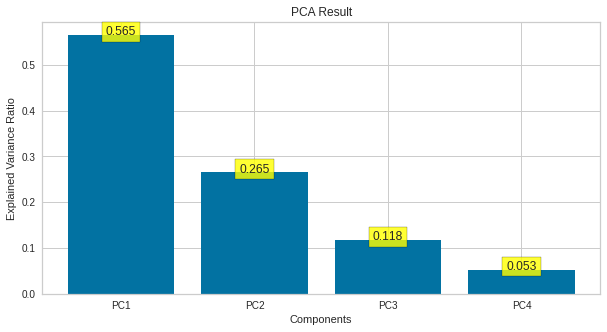

In [34]:
value_x = [0.565,0.265,0.118,0.053]
label_x = ['PC1', 'PC2','PC3','PC4']
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',
                 Bbox = dict(facecolor = 'yellow', alpha =.8))
  
if __name__ == '__main__':
    
    # creating data on which bar chart will be plot
    x = label_x
    y = value_x
      
    # setting figure size by using figure() function 
    plt.figure(figsize = (10,5))
      
    # making the bar chart on the data
    plt.bar(x, y)
      
    # calling the function to add value labels
    addlabels(x, y)
      
    # giving title to the plot
    plt.title("PCA Result")
      
    # giving X and Y labels
    plt.xlabel("Components")
    plt.ylabel("Explained Variance Ratio")
      
    # visualizing the plot
    plt.show()

Berdasarkan hasil PCA di atas, dapat dilihat bahwa secara bersama-sama dengan menggunakan 2 principal component (PC) sudah mencakup 0,83 atau 83 % keragaman dari 4 variabel yang digunakan sehingga dapat dilakukan analisis tahap selanjutnya dengan hanya menggunakan 2 komponen tersebut.

In [35]:
pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_scaled)
X_principal = pd.DataFrame(X_principal)

X_principal.columns = ['PC1', 'PC2']
X_principal = X_principal.assign(provinsi=label)
X_principal = X_principal.set_index('provinsi')
X_principal

,PC1,PC2
provinsi,,
ACEH,0.660137,2.380313
SUMATERA UTARA,-0.011677,0.091012
SUMATERA BARAT,1.071740,-0.540665
RIAU,0.402503,0.259073
JAMBI,-0.359879,0.824757
SUMATERA SELATAN,-0.691769,-0.833904
BENGKULU,0.031090,-0.102918
LAMPUNG,-1.639933,-0.531341
KEP. BANGKA BELITUNG,0.427267,-0.860617


# Hierarchical Clustering

## Silhouette Coefficient Visualization

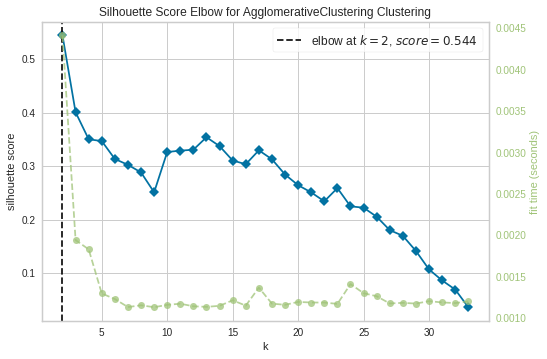

In [36]:
model1 = AgglomerativeClustering(linkage='average')
visualizer = KElbowVisualizer(model1, k=(2,34), metric='silhouette')
visualizer.fit(X_principal)
visualizer.show()

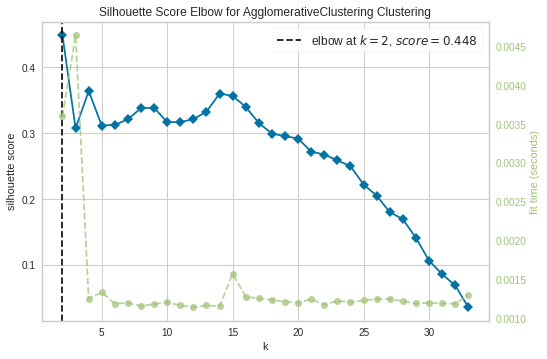

In [37]:
model2 = AgglomerativeClustering(linkage='ward')
visualizer = KElbowVisualizer(model2, k=(2,34), metric='silhouette')
visualizer.fit(X_principal)
visualizer.show()

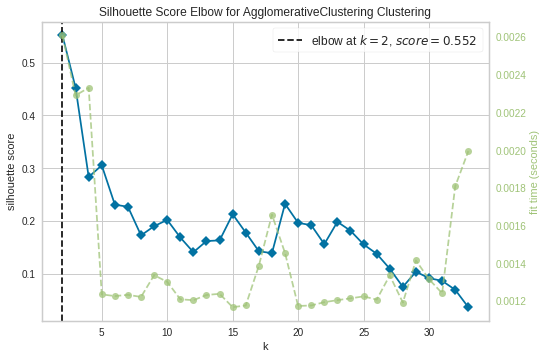

In [38]:
model3 = AgglomerativeClustering(linkage='single')
visualizer = KElbowVisualizer(model3, k=(2,34), metric='silhouette')
visualizer.fit(X_principal)
visualizer.show()

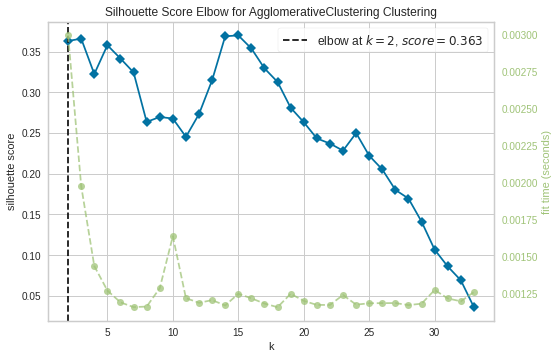

In [39]:
model4 = AgglomerativeClustering(linkage='complete')
visualizer = KElbowVisualizer(model4, k=(2,34), metric='silhouette')
visualizer.fit(X_principal)
visualizer.show()

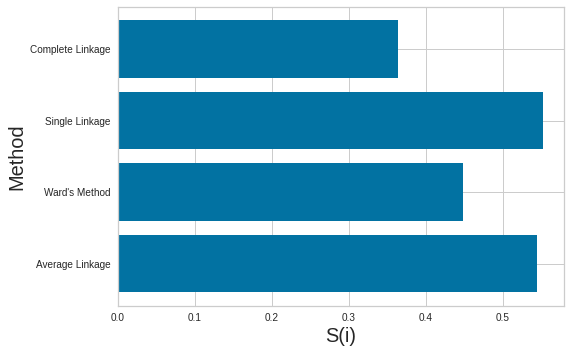

In [40]:

ac1 = AgglomerativeClustering(n_clusters = 2, linkage='average')
ac2 = AgglomerativeClustering(n_clusters = 2, linkage='ward')
ac3 = AgglomerativeClustering(n_clusters = 2, linkage='single')
ac4 = AgglomerativeClustering(n_clusters = 2, linkage='complete')
sh1 = silhouette_score(X_principal, ac1.fit_predict(X_principal))
sh2 = silhouette_score(X_principal, ac2.fit_predict(X_principal))
sh3 = silhouette_score(X_principal, ac3.fit_predict(X_principal))
sh4 = silhouette_score(X_principal, ac4.fit_predict(X_principal))


k = ['Average Linkage', "Ward's Method",'Single Linkage','Complete Linkage']
  
# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(sh1)
silhouette_scores.append(sh2)
silhouette_scores.append(sh3)
silhouette_scores.append(sh4)
  
# Plotting a bar graph to compare the results
plt.barh(k, silhouette_scores)
plt.ylabel('Method', fontsize = 20)
plt.xlabel('S(i)', fontsize = 20)
plt.show()

In [55]:
method = ['Average Linkage', "Ward's Method",'Single Linkage','Complete Linkage']
score_method = pd.DataFrame(method, columns=['Metode'])
score_method['silhouette_score'] = [sh1,sh2,sh3,sh4]

score_method = score_method.sort_values(by=['silhouette_score'], ascending=False)

score_method
score_method.to_excel (r'/content/drive/MyDrive/silhouette_score_disjas.xlsx', index = False, header=True)
score_method

,Metode,silhouette_score
2,Single Linkage,0.551899
0,Average Linkage,0.544284
1,Ward's Method,0.448293
3,Complete Linkage,0.363093


## Dendrogram

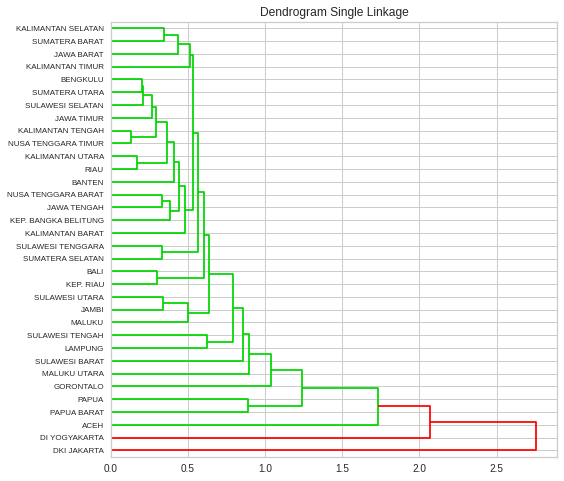

In [45]:
plt.figure(figsize =(8, 8))
plt.title('Dendrogram Single Linkage')
shc.set_link_color_palette(['#00d600'])
Dendrogram1 = shc.dendrogram((shc.linkage(X_principal, method ='single')), labels=label, orientation='right',above_threshold_color='#FF0000')

## Result

In [43]:
cluster = ac3.fit_predict(X_principal)
cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [56]:
X['cluster'] = cluster + 1
X.to_excel (r'/content/drive/MyDrive/klaster_disjas.xlsx', index = False, header=True)
X

,kode_prov,provinsi,X1,X2,X3,X4,cluster
0,11,ACEH,85.41,41.11,20.34,93.35,1
1,12,SUMATERA UTARA,79.26,55.14,16.25,94.24,1
2,13,SUMATERA BARAT,80.18,59.35,21.90,95.17,1
3,14,RIAU,80.43,52.39,18.16,94.94,1
4,15,JAMBI,79.97,48.36,14.24,94.30,1
5,16,SUMATERA SELATAN,73.90,56.15,14.48,95.21,1
6,17,BENGKULU,78.32,54.72,17.02,94.70,1
7,18,LAMPUNG,72.24,57.32,10.69,93.38,1
8,19,KEP. BANGKA BELITUNG,77.81,55.68,17.77,96.63,1
9,21,KEP. RIAU,82.98,53.09,25.82,95.57,1


In [57]:
klaster = X.groupby(["cluster"]).mean()

klaster.to_excel (r'/content/drive/MyDrive/interpretasi_disjas.xlsx', index = False, header=True)
round(klaster,2)

,kode_prov,X1,X2,X3,X4
cluster,,,,,
1,48.06,76.80,53.35,17.92,94.44
2,31.00,89.32,51.20,43.05,95.92
